In [1]:
import warnings
warnings.filterwarnings(
    "ignore",
)
import os
os.environ["NIXTLA_ID_AS_COL"] = "true"
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(1)
import random
random.seed(1)
import pandas as pd
pd.set_option("max_colwidth", 100)
pd.set_option("display.precision", 3)
from utilsforecast.plotting import plot_series as plot_series_utils
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})

# Define a harmonious palette (8 colors)
ggplot_palette = [
    "#E24A33",  # orange-red
    "#348ABD",  # blue
    "#988ED5",  # purple
    "#777777",  # gray
    "#FBC15E",  # yellow
    "#8EBA42",  # green
    "#FFB5B8",  # pink
    "#17BECF",  # cyan
]

# Apply the palette globally
sns.set_palette(ggplot_palette)

import matplotlib as mpl
from fpppy.utils import plot_series

from IPython.display import Image
from functools import partial
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from utilsforecast.evaluation import evaluate
from utilsforecast.feature_engineering import pipeline, trend
from utilsforecast.losses import rmse, mae, mape as _mape, mase, quantile_loss, mqloss

def mape(df, models, id_col = "unique_id", target_col = "y"):
    df_mape = _mape(df, models, id_col=id_col, target_col=target_col)
    df_mape.loc[:, df_mape.select_dtypes(include='number').columns] *= 100
    return df_mape

from statsforecast import StatsForecast
from statsforecast.models import SklearnModel
from statsforecast.utils import ConformalIntervals
from statsforecast.models import (
    WindowAverage,
    Naive,
    SeasonalNaive,
    RandomWalkWithDrift,
    HistoricAverage,
)
from fpppy.models import LinearRegression

In [2]:
df = pd.read_csv(f'../DATA/global_economy.csv')
df['ds'] = pd.to_datetime(df['ds'], format='%Y')
df = df.set_index('ds')
df = df[df['Code'] == 'AUS']
data = df[['unique_id', 'Population']].reset_index()
data = data.rename(columns={'Population' : 'y'})
train = data[:-5]
test = data[-5:].drop('y', axis=1)
data = data.set_index('ds')

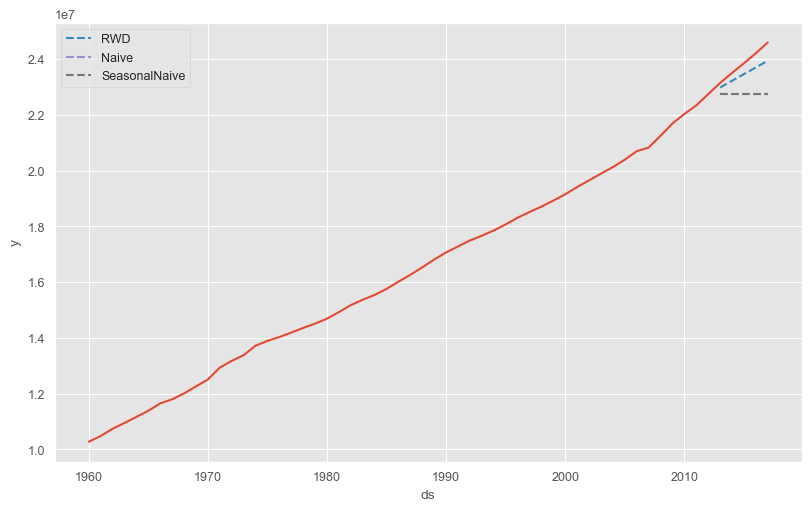

In [18]:
method_list = [RandomWalkWithDrift(), Naive(), SeasonalNaive(season_length=1)]
sns.lineplot(data, x=data.index, y='y')
for method in method_list:
    sf = StatsForecast(models=[method], freq='Ye')
    prediction = sf.fit(train)
    prediction = sf.predict(5, test)
    prediction = prediction.set_index('ds')
    sns.lineplot(x=prediction.index, y=prediction.iloc[:,1], linestyle='--', label=prediction.columns[1])

In [46]:
df = pd.read_csv(f'../DATA/aus_production.csv')
df['ds'] = pd.to_datetime(df['ds'])
data = df[['ds', 'Bricks']].dropna()
data['unique_id'] = 'brick'
data = data.rename(columns={'Bricks':'y'})
train = data[:-10]
test = data[-10:].drop('y', axis=1)
data = data.set_index('ds')

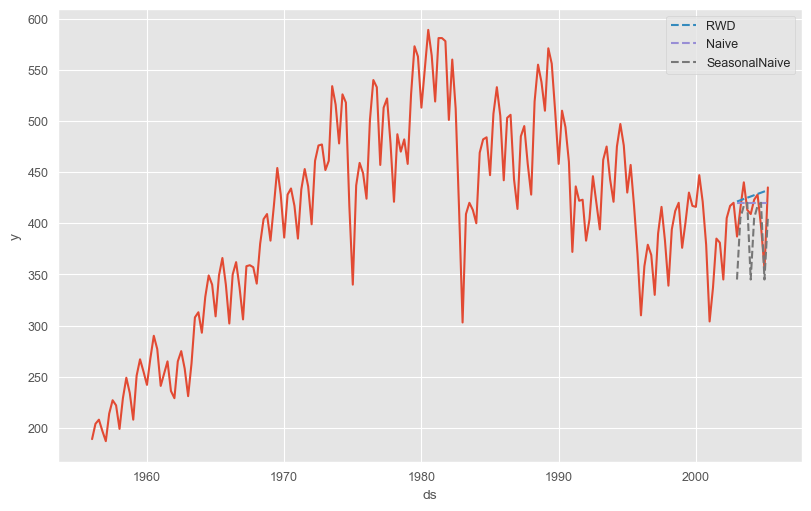

In [49]:
method_list = [RandomWalkWithDrift(), Naive(), SeasonalNaive(season_length=4)]
sns.lineplot(data, x=data.index, y='y')
for method in method_list:
    sf = StatsForecast(models=[method], freq='Q')
    prediction = sf.fit(train)
    prediction = sf.predict(10, test)
    prediction = prediction.set_index('ds')
    sns.lineplot(x=prediction.index, y=prediction.iloc[:,1], linestyle='--', label=prediction.columns[1])

In [66]:
df = pd.read_csv(f'../DATA/aus_livestock.csv')
df['ds'] = pd.to_datetime(df['ds'])
df = df[df['unique_id'] == 'New South Wales_Lambs']
train = df[:-12]
test = df[-12:].drop('y', axis=1)
data = df.set_index('ds')

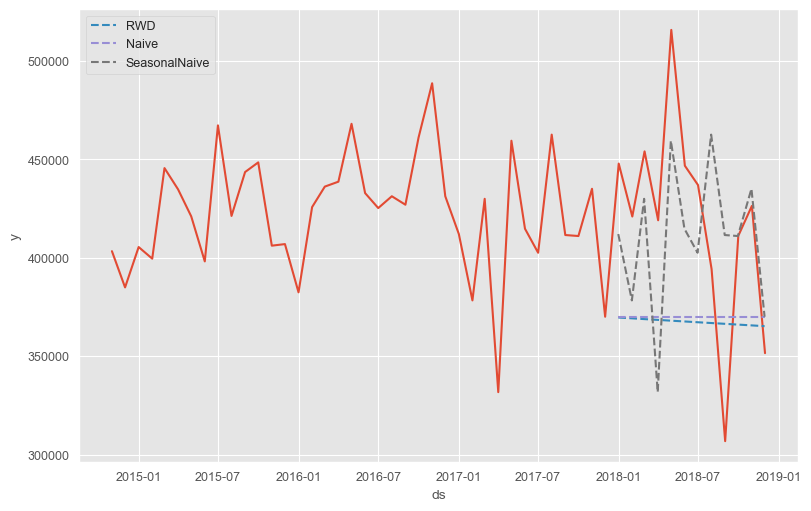

In [71]:
method_list = [RandomWalkWithDrift(), Naive(), SeasonalNaive(season_length=12)]
sns.lineplot(data[-50:], x=data[-50:].index, y='y')
for method in method_list:
    sf = StatsForecast(models=[method], freq='M')
    prediction = sf.fit(train)
    prediction = sf.predict(12, test)
    prediction = prediction.set_index('ds')
    sns.lineplot(x=prediction.index, y=prediction.iloc[:,1], linestyle='--', label=prediction.columns[1])